### C S 329E HW 4

## Pair Programming Group Number: 18
## Members of Team: Fayed Nassor ; Mohamad Minoneshan

## Decision Tree Classifier


For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits.
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class in the scikit-learn package.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`.

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree (we'll also see what happens if we use the same data to test as we used to train the data in the last problem)
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the class label housing "Type", which is 'h' house, 'u' duplex, or 't' townhome.

In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn import tree # you'll probably need to install this - look at Q6 for a link
import graphviz # you'll probably need to install this - look at Q6 for a link

In [ ]:
df_train = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/f8ba57f8377dee0810271475c728fca8/raw/afa3fa4305b55e31135980835d40b27af31f288c/melb_tree_train.csv')
df_train.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,t,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,u,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,h,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,u,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


In [ ]:
df_test = pd.read_csv('https://gist.githubusercontent.com/yanyanzheng96/ec66da011b165f0e282c0c1f8447010e/raw/d02c3829a7e9db2d156ba1ab9d5bb4d18ae57be8/melb_tree_test.csv')
df_test.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,t,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,Yarra
1,3,t,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,Hobsons Bay
2,4,h,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,Moreland
3,2,t,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,Moreland
4,3,t,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,Darebin


## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X`, which contains the features of the data set (everything but `Type`), and `s_y`, the series containing just the class label (just `Type`). The lengths of `df_X` and `s_y` should match.

In [ ]:
# Split the data into features and class label
df_X = df_train.drop("Type", axis=1)
s_y = df_train["Type"]
df_X.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne


In [ ]:
df_X = pd.get_dummies(df_X, columns=['CouncilArea'])
df_X

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea_Banyule,...,CouncilArea_Maribyrnong,CouncilArea_Melbourne,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Wyndham,CouncilArea_Yarra
0,2,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,2,855000.0,11.4,2.0,1.0,1.0,158.0,106.0,1994.0,0,...,0,0,0,0,0,0,0,0,0,0
806,2,696000.0,2.6,2.0,2.0,1.0,0.0,68.0,2008.0,0,...,0,0,0,0,0,0,0,0,0,1
807,2,520000.0,9.9,2.0,1.0,1.0,0.0,82.0,2011.0,0,...,0,0,0,0,1,0,0,0,0,0
808,3,815000.0,4.3,3.0,2.0,2.0,198.0,130.0,1990.0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
s_y.head()

0    t
1    t
2    u
3    h
4    u
Name: Type, dtype: object

In [ ]:
# Check the shapes of the dataframes
print("Shape of df_X:", df_X.shape)
print("Shape of s_y:", s_y.shape)

Shape of df_X: (810, 30)
Shape of s_y: (810,)


## Q2 Implement a function to calculate entropy
Implement a function `calc_entropy` that takes the the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [ ]:
# calc_entropy(s_y) definition
def calc_entropy(s_y):
    # Count the number of occurrences of each class label
    counts = s_y.value_counts()
    total = len(s_y)
    entropy = 0

    # Calculate the entropy for each class label
    for count in counts:
        p = count / total
        entropy -= p * np.log2(p)

    return entropy

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [ ]:
# The entire data set
entropy_total = calc_entropy(s_y)
entropy_total

1.582533311426178

In [ ]:
# Less than or equal to 200
mask1 = (df_X["Landsize"] <= 200)
entropy1 = calc_entropy(s_y[mask1])
entropy1

1.3456432116206725

In [ ]:
# Between 200 and 450
mask2 = ((df_X["Landsize"] > 200) & (df_X["Landsize"] <= 450))
entropy2 = calc_entropy(s_y[mask2])
entropy2

1.4660501816027975

In [ ]:
# greater than 450
mask3 = (df_X["Landsize"] > 450)
entropy3 = calc_entropy(s_y[mask3])
entropy3

1.09954792005911

## Q4 Implement a function to calculate the Gini Index
Implement the function `calc_gini` that takes the class label series, `s_y`, as a parameter. Implement using the definition on p128 in the DM book and only use the pandas library.

In [ ]:
def calc_gini( s_y ):
      # Count the number of occurrences of each class label
    counts = s_y.value_counts()
    total = len(s_y)
    gini = 1

    # Calculate the Gini index for each class label
    for count in counts:
        p = count / total
        gini -= p**2

    return gini

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from the following three intervals:

(i) Landsize $\in [0,200]$

(ii) Landsize $\in (200,450]$

(iii) Landsize $\in (450, \infty)$

In [ ]:
# The entire data set
gini_total = calc_gini(s_y)
gini_total

0.6655601280292637

In [ ]:
# Less than or equal to 200
# mask1 = (df_X["Landsize"] <= 200)
gini1 = calc_gini(s_y[mask1])
gini1

0.5741211482422965

In [ ]:
# Between 200 and 450
# mask2 = ((df_X["Landsize"] > 200) & (df_X["Landsize"] <= 450))
gini2 = calc_gini(s_y[mask2])
gini2

0.6101021682602731

In [ ]:
# greater than 450
# mask3 = (df_X["Landsize"] > 450)
gini3 = calc_gini(s_y[mask3])
gini3

0.4381934171597633

## Q6 Create a decision tree
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3.

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)).

In [ ]:
# Create Tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(df_X, s_y)


In [ ]:
# Display text version of the tree
tree.export_text(clf)

'|--- feature_8 <= 1977.50\n|   |--- feature_0 <= 2.50\n|   |   |--- feature_1 <= 915000.00\n|   |   |   |--- class: u\n|   |   |--- feature_1 >  915000.00\n|   |   |   |--- class: h\n|   |--- feature_0 >  2.50\n|   |   |--- feature_6 <= 429.00\n|   |   |   |--- class: h\n|   |   |--- feature_6 >  429.00\n|   |   |   |--- class: h\n|--- feature_8 >  1977.50\n|   |--- feature_7 <= 104.31\n|   |   |--- feature_6 <= 76.00\n|   |   |   |--- class: u\n|   |   |--- feature_6 >  76.00\n|   |   |   |--- class: t\n|   |--- feature_7 >  104.31\n|   |   |--- feature_6 <= 391.00\n|   |   |   |--- class: t\n|   |   |--- feature_6 >  391.00\n|   |   |   |--- class: h\n'

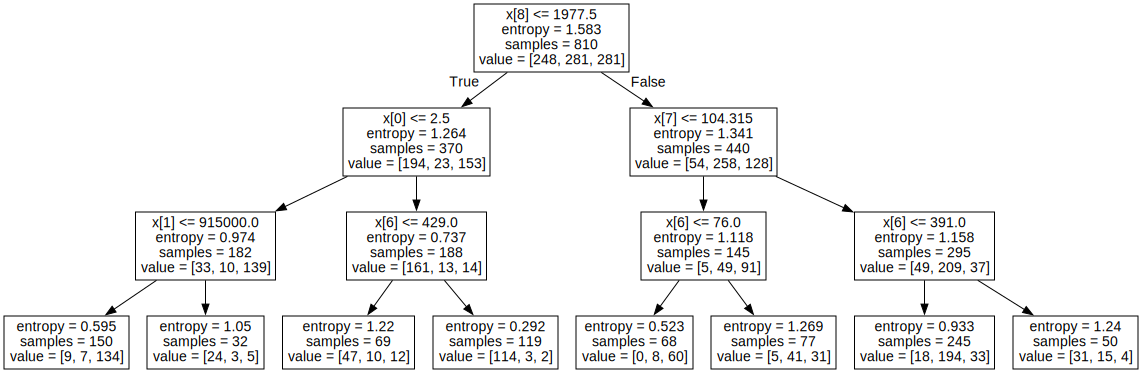

In [ ]:
# Display graphviz version of the tree
dot_data = tree.export_graphviz(clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

**➡️** Answer containing your descriptive analytics in markdown here ⬅️

* The first split tests the 8th feature (YearBuilt), comparing it to a threshold of 1977.5. If the value of YearBuilt is less than or equal to the threshold, the data is divided into two groups based on the second split, which tests the 0th feature (Rooms), comparing it to a threshold of 2.5. If the value of Rooms is less than or equal to the threshold, the data is divided into two groups based on the third split, which tests the 1st feature (Price), comparing it to a threshold of 915000. If the value of Price is less than or equal to the threshold, the class is predicted as 'u' (unknown), otherwise, it is predicted as 'h' (house).

* If the value of Rooms is greater than the threshold, the data is divided into two groups based on the third split, which tests the 6th feature (Distance), comparing it to a threshold of 429. If the value of Distance is less than or equal to the threshold, the class is predicted as 'h' (house), otherwise, it is predicted as 't' (townhouse).

* If the value of YearBuilt is greater than the threshold, the data is divided into two groups based on the second split, which tests the 7th feature (BuildingArea), comparing it to a threshold of 104.31. If the value of BuildingArea is less than or equal to the threshold, the data is divided into two groups based on the third split, which tests the 6th feature (Distance), comparing it to a threshold of 76. If the value of Distance is less than or equal to the threshold, the class is predicted as 'u' (unknown), otherwise, it is predicted as 't' (townhouse).

* If the value of BuildingArea is greater than the threshold, the data is divided into two groups based on the third split, which tests the 6th feature (Distance), comparing it to a threshold of 391. If the value of Distance is less than or equal to the threshold, the class is predicted as 't' (townhouse), otherwise, it is predicted as 'h' (house).



## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data from melb_tree_test.csv.

Use the scikit-learn library to create many decision trees, each one with a different configuration (aka Hyperparameters).  You will create 28 different trees by:

    - Varying the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Varying the max depth from 2 to 15 with the Entropy as the impurity measure

Implementation tip: you can create an array of numbers from 2 to 15 by using the numpy function [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

For each of the 28 decistion trees, calculate the error rate by using the data in the:
  - Training set, and
  - Test set.

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis). Your plot will include 4 series of data
   - Test error (entropy)
   - Test error (gini index)
   - Training error (entropy)
   - Training error (gini index)

In [ ]:
# Load in the test data
df_X_test = df_test.drop("Type", axis=1)
s_y_test = df_test["Type"]
df_X_test = pd.get_dummies(df_X_test, columns=['CouncilArea'])
df_X_test.head()


,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea_Banyule,...,CouncilArea_Maribyrnong,CouncilArea_Melbourne,CouncilArea_Monash,CouncilArea_Moonee Valley,CouncilArea_Moreland,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Whitehorse,CouncilArea_Wyndham,CouncilArea_Yarra
0,2,930000.0,2.6,2.0,1.0,1.0,97.0,85.0,2004.0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,815000.0,11.0,3.0,2.0,2.0,159.0,130.0,2014.0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,638000.0,13.0,4.0,2.0,1.0,624.0,258.0,2005.0,0,...,0,0,0,0,1,0,0,0,0,0
3,2,595000.0,11.2,2.0,2.0,1.0,201.0,111.0,2005.0,0,...,0,0,0,0,1,0,0,0,0,0
4,3,620500.0,11.2,3.0,2.0,1.0,158.0,117.0,2011.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Build the trees using the training data
from sklearn.metrics import accuracy_score

# Define an array of max depths to test
max_depths = np.arange(2, 16)

# Define arrays to store error rates
train_errors_entropy = []
test_errors_entropy = []
train_errors_gini = []
test_errors_gini = []

# Iterate over the max depths and calculate error rates
for md in max_depths:
    # Create decision trees with entropy and gini impurity measures
    clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=md)
    clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=md)

    # Train the decision trees
    clf_entropy = clf_entropy.fit(df_X, s_y)
    clf_gini = clf_gini.fit(df_X, s_y)

    # Make predictions for the training and test sets
    s_y_train_pred_entropy = clf_entropy.predict(df_X)
    s_y_train_pred_gini = clf_gini.predict(df_X)
    s_y_test_pred_entropy = clf_entropy.predict(df_X_test)
    s_y_test_pred_gini = clf_gini.predict(df_X_test)

    # Calculate the error rates
    train_error_entropy = 1 - accuracy_score(s_y, s_y_train_pred_entropy)
    test_error_entropy = 1 - accuracy_score(s_y_test, s_y_test_pred_entropy)
    train_error_gini = 1 - accuracy_score(s_y, s_y_train_pred_gini)
    test_error_gini = 1 - accuracy_score(s_y_test, s_y_test_pred_gini)

    # Add the error rates to the arrays
    train_errors_entropy.append(train_error_entropy)
    test_errors_entropy.append(test_error_entropy)
    train_errors_gini.append(train_error_gini)
    test_errors_gini.append(test_error_gini)






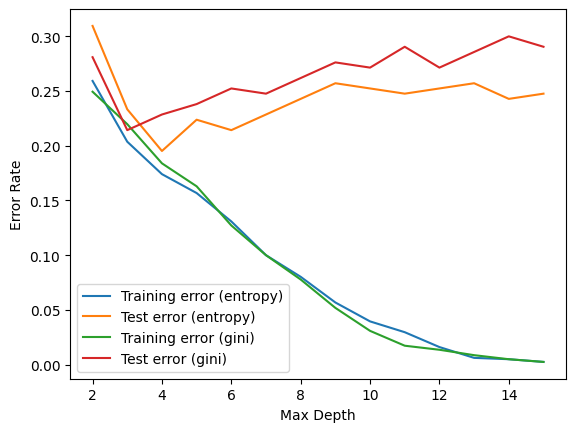

In [ ]:
# Plot the 4 learning curves
plt.plot(max_depths, train_errors_entropy, label='Training error (entropy)')
plt.plot(max_depths, test_errors_entropy, label='Test error (entropy)')
plt.plot(max_depths, train_errors_gini, label='Training error (gini)')
plt.plot(max_depths, test_errors_gini, label='Test error (gini)')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')
plt.legend()
plt.show()

➡️ Answer containing your analysis of the trend (or if no trend present, offer a hypotheisis of why) here ⬅️

* This will display a graph with the max depth on the x-axis and the error rate on the y-axis. There will be four lines, representing the test and training error rates for both the entropy and gini impurity measures.

* The learning curve shows that as the maximum depth increases, the training error rates decrease for both entropy and gini impurity measures. However, the test error rates for both measures increase as the maximum depth increases. This is likely due to overfitting, where the model is too complex and fits the training data too closely, causing it to perform poorly on new data.

* In general, a simpler model with a lower maximum depth may perform better on new data than a more complex model with a higher maximum depth.